In [24]:
import seaborn as sns; sns.set()
import numpy as np

## Étapes importantes
### 1) Charger le dataset
### 2) Isoler la variable cible des features
     On récupère X et Y
### 3) Split train test
     Prendre une partie des données pour entrainer le modèle (fit)
     Et l'autre partie pour vérifier les performaces
### 4) Créer et entrainer un modèle
     model = CLASS() //Constructeur
     model.fit(X, Y) //Entraine le modèle
### 5) Mesurer les performaces

# 1) Charger le dataset

In [25]:
iris = sns.load_dataset("iris")

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
#Nombre de classes cibles
iris['species'].nunique()

#Dénomination des classes cibles
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

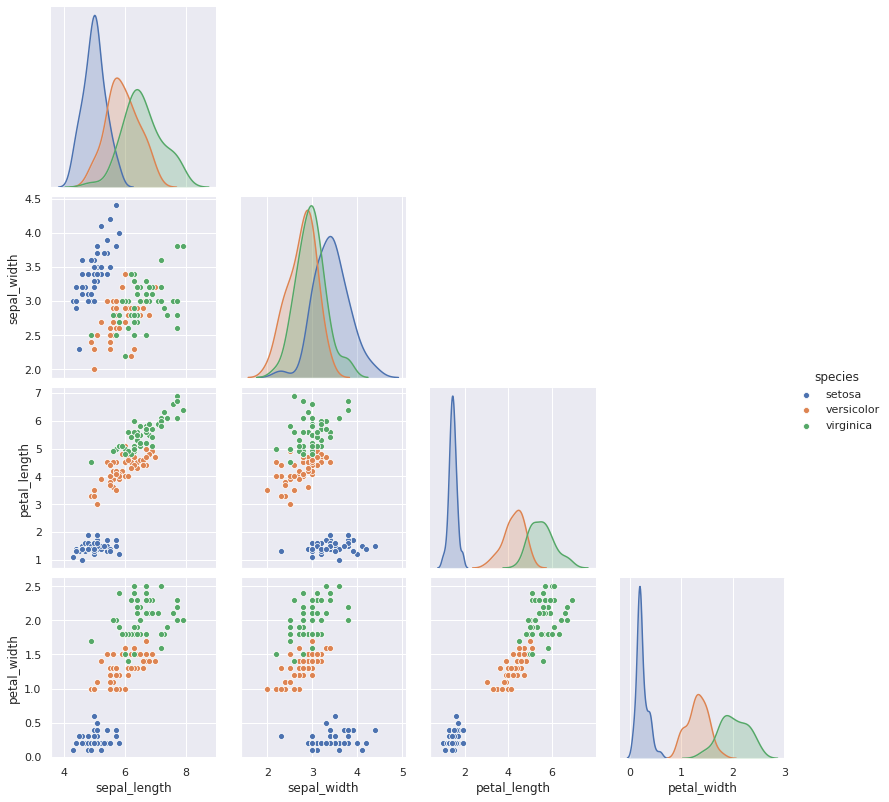

In [27]:
sns.pairplot(iris, hue="species", diag_kind="kde", height=2.75, corner=True)

# 2) Séparer les features de la target

In [28]:
# Target
Y = iris['species'].astype('category').cat.codes

In [29]:
Y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int8

In [30]:
Y.tail()

145    2
146    2
147    2
148    2
149    2
dtype: int8

In [31]:
vocabulaire = iris['species'].astype('category').cat.categories

In [32]:
vocabulaire

Index(['setosa', 'versicolor', 'virginica'], dtype='object')

In [33]:
#Transformer les targets en nombres [ENCODAGE]
Y = iris['species'].astype('category').cat. 

#Objtenir un truc qui permet de passer 
#1) de classes vers nombres
#2) de nombres vers classes
classe2index = {v:i for i, v in enumerate(vocabulaire.to_list())}
index2classe = {i:v for i, v in enumerate(vocabulaire.to_list())}

SyntaxError: invalid syntax (<ipython-input-33-edd9281cc32f>, line 2)

In [ ]:
Y = iris['species'].astype('category').cat.codes
classes= iris['species'].astype('category').cat.categories.tolist()

In [ ]:
classe2index

In [ ]:
index2classe

In [ ]:
classes.index('setosa')

In [ ]:
classes[0]

In [ ]:
X = iris.drop('species', axis='columns')

In [ ]:
X.shape, Y.shape

In [ ]:
#Le minimum syndical
iris2 = sns.load_dataset('iris')
Y = iris['species'].astype('category').cat.codes
X = iris.drop('species', axis='columns')

# 4) Entrainer et créer un model

### K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN

# Créer l'algo
knn = KNN(n_neighbors=3)

knn

### Entrainer un model

In [ ]:
knn.fit(X, Y)

### Faire une prediction

In [ ]:

knn.predict(X)

# 5) Mesurer les performances

In [170]:

def accuracy(preds, target):
    M = target.shape[0] #Nombre d'exemples
    total_correct = (preds == target).sum()
    accuracy = total_correct / M
    return accuracy

    #return (preds == Y).sum() / len(Y)

In [ ]:
predictions = knn.predict(X)
print(accuracy(predictions, Y))

## Tracer les frontières

In [151]:
from sklearn.datasets import make_moons

X, Y = make_moons(random_state=0, noise=0.3)

In [152]:
X.shape, Y.shape

((100, 2), (100,))

In [153]:
X[:5]

array([[ 0.03159499,  0.98698776],
       [ 2.11509784, -0.04624397],
       [ 0.88248972, -0.07575606],
       [-0.0551441 , -0.03733246],
       [ 0.82954503, -0.53932149]])

In [154]:
Y[:5]

array([0, 1, 0, 1, 1])

In [155]:
X[:, 0] #Toutes les lignes & colonne 0

array([ 0.03159499,  2.11509784,  0.88248972, -0.0551441 ,  0.82954503,
        2.11285708,  0.5696927 ,  0.95217454, -0.02922115,  1.71579557,
       -0.27883014,  2.00344509,  1.50009616,  1.22540835,  0.46730819,
       -0.36653222,  0.30124459,  0.30430746, -0.23712492,  1.16339832,
       -0.59702417,  0.46356735,  0.68451111,  0.70515699, -0.65805008,
       -0.74662946,  0.60585226,  2.18137168,  1.91980633,  1.4834364 ,
        0.47404723,  1.05614605,  1.86500732,  0.4194721 ,  0.06873258,
       -0.17332432,  0.12412421,  0.18121142, -0.25451559,  1.02580668,
        1.52002143,  0.64174037, -0.87615589, -1.06964997,  1.02658765,
        0.93131325,  0.67680544, -0.36885733, -1.02465495,  0.77455385,
        1.4045116 , -0.38147174,  0.72155224, -0.51346686,  0.32118546,
        0.1953628 ,  0.52824196, -0.2216539 ,  0.22334676, -0.10704572,
        0.63651685, -0.37227848,  0.20718083,  0.12733142,  0.71435231,
        1.09487814, -0.14814362,  1.586188  ,  0.74444551,  2.18

In [156]:
import pandas as pd
df_moon = pd.DataFrame({
    'X0': X[:,0],
    'X1': X[:,1],
    'Y': Y})

df_moon.head()

,X0,X1,Y
0,0.031595,0.986988,0
1,2.115098,-0.046244,1
2,0.882490,-0.075756,0
3,-0.055144,-0.037332,1
4,0.829545,-0.539321,1


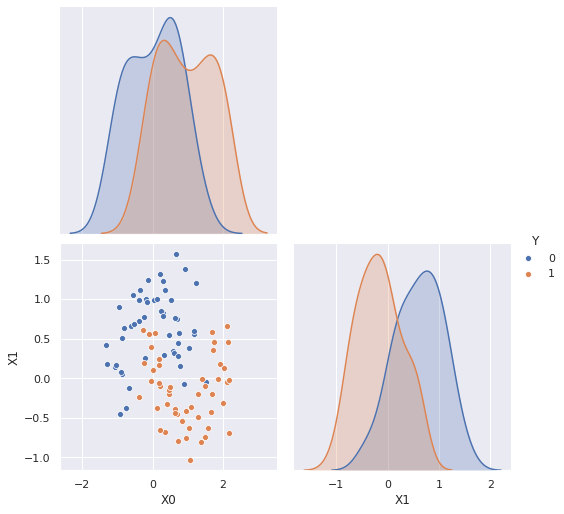

In [157]:
sns.pairplot(data=df_moon, hue='Y', height=3.5, corner=True)

## Visualiser les frontières de décision

### Déterminer la plage de valeur

In [158]:
def plage_de_valeur(df, col, b=0.2):
    # b : bordure
    min =  df[col].min() - b
    max = df[col].max() + b
    return (min, max) #Retroune un pipe contenant min et max

### Créer les axes

In [159]:
# * = Eclate le pipe et mets une virgule
X0_range = np.arange(*plage_de_valeur(df_moon, 'X0'), 0.1)
X1_range = np.arange(*plage_de_valeur(df_moon, 'X1'), 0.1)

### Créer le maillage

In [160]:
X0_mesh, X1_mesh = np.meshgrid(X0_range, X1_range)

X0_mesh.shape, X1_mesh.shape

((31, 39), (31, 39))

### Démêler le maillage

In [161]:
X0_mesh, X1_mesh = X0_mesh.ravel(), X1_mesh.ravel()

X0_mesh.shape, X1_mesh.shape

((1209,), (1209,))

### Création d'un DataFrame avec les 2 mesh

In [162]:
mesh_df = pd.DataFrame({
    "X0": X0_mesh,
    "X1": X1_mesh
})

### Afficher le maillage

<AxesSubplot:xlabel='X0', ylabel='X1'>

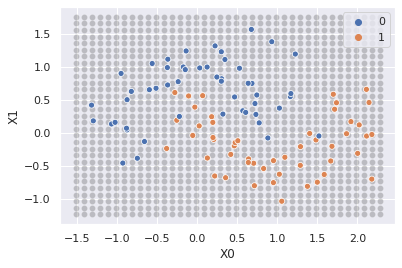

In [163]:
sns.scatterplot(X0_mesh, X1_mesh, color="black", alpha=0.2)
sns.scatterplot(df_moon['X0'], df_moon['X1'], hue=df_moon['Y'].to_list())

## Avec K=1

In [164]:
knn = KNN(n_neighbors=1)

# entrainer sur moon


## En mode fonction

In [165]:
def plot_knn_decision(K=1):
    knn = KNN(n_neighbors=K);
    knn.fit(X, Y)
    mesh_predictions = knn.predict(mesh_df)
    sns.scatterplot(X0_mesh, X1_mesh, hue=mesh_predictions, alpha=0.45)
    sns.scatterplot(df_moon['X0'], df_moon['X1'], hue=df_moon['Y'].to_list())

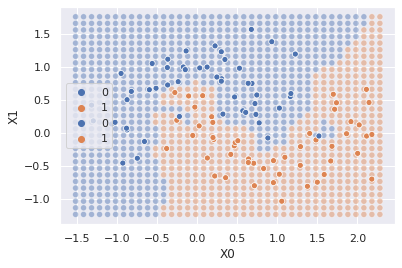

In [166]:
plot_knn_decision(1)

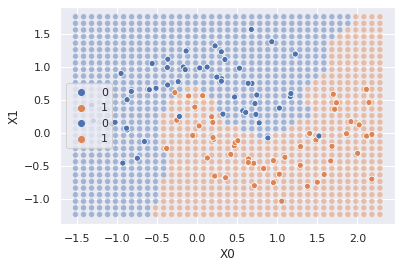

In [167]:
plot_knn_decision(5)

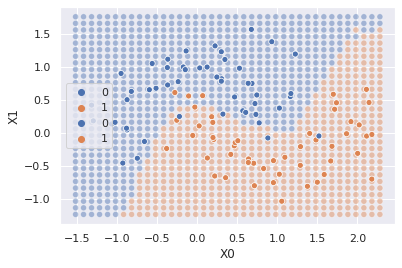

In [168]:
plot_knn_decision(21)

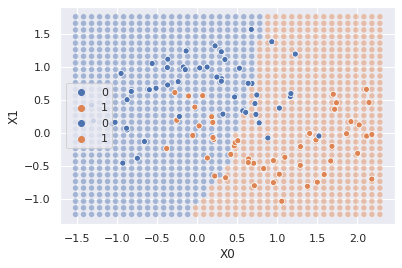

In [169]:
plot_knn_decision(99)